## 1a:
In the case of $B = 0$,our partition function becomes:

$$
z = \sum_{s_0 =\pm 1}g_n(s_0)^q
$$

Which is an easy enough function to expand:

$$
z = g_n(1)^q + g_n(-1)^q
$$

Now let $x = g_n(-1)/g_n(1) = 1$. Then $g_n(1) = g_n(-1)$, and the two contributions to our partition functions are the same. 

The partition function represents the entire probability space, and the space contributed by $s_0 = 1$ and $s_0 = -1$ are the same. Since they balance each other, and this is the $n \to \infty$ limit, the contribution to the spin up state and spin down state balance, and therefore, the net magnetization must be zero. 

Now let's examine the ratio again:

$$x = \frac{g_n(-1)}{g_n(+1)}$$

Above $T_c$ of course the net magnetization _must_ be zero. But below that, this ratio effectively quantifies the weight of the down state compared to the weight of the up state. So when the up state becomes significantly more likely, this ratio **becomes less than one**. 

## 1b:

Here's our recursion relation:

$$
x = \frac{e^{\beta (B - J)} + e^{-\beta (B - J)} x^{q-1}}{e^{\beta (B + J)} + e^{-\beta (B + J)} x^{q-1}}
$$

In the $B = 0$ case, this becomes:

$$x = \frac{e^{-\beta  J} + e^{\beta  J} x^{q-1}}{e^{\beta  J} + e^{-\beta  J} x^{q-1}}$$


So the LHS is $x$, and the RHS recursively depends on $x$. So one way we can solve this is to take the derivative with respect to $x$ on both sides. 

On the LHS, this _must_ be $1$. What will the RHS give us? I'll use sympy (like Mathematica) to do my algebra for me:

In [61]:
from sympy import symbols, exp, Eq, diff, solve, simplify
x, beta, J, q = symbols('x beta J q')

lhs = x
rhs = (exp(-beta * J) + exp(beta * J) * x**(q - 1)) / (exp(beta * J) + exp(-beta * J) * x**(q - 1))
rhs

(x**(q - 1)*exp(J*beta) + exp(-J*beta))/(x**(q - 1)*exp(-J*beta) + exp(J*beta))

(Just getting the RHS written out as sympy)

In [62]:
equation = Eq(lhs, rhs)
equation

Eq(x, (x**(q - 1)*exp(J*beta) + exp(-J*beta))/(x**(q - 1)*exp(-J*beta) + exp(J*beta)))

The above is our recursion equation. Let's differentiate the RHS...

In [51]:
rhs_derivative = diff(rhs, x)
rhs_derivative

x**(q - 1)*(q - 1)*exp(J*beta)/(x*(x**(q - 1)*exp(-J*beta) + exp(J*beta))) - x**(q - 1)*(q - 1)*(x**(q - 1)*exp(J*beta) + exp(-J*beta))*exp(-J*beta)/(x*(x**(q - 1)*exp(-J*beta) + exp(J*beta))**2)

And then substitue $x = 1$, which, as we argued before, is the case for a net zero magnetization at $B = 0$. 

In [65]:
rhs_deriv_simp = rhs_derivative.subs(x, 1)
rhs_deriv_simp

(q - 1)*exp(J*beta)/(exp(J*beta) + exp(-J*beta)) - (q - 1)*exp(-J*beta)/(exp(J*beta) + exp(-J*beta))

Then set our RHS derivative equal to 1, and solve for $\beta_c$:

In [66]:
eqn = Eq(rhs_deriv_simp, 1)
beta_c = solve(eqn, beta)[0]

Then we can report the critical temperature $kT_c$ as $1/\beta$:

In [69]:
simplify(1/beta_c)

J/log(-sqrt(q/(q - 2)))

Which is, by algebra, identical to:

$$
kT_c =\frac{2J}{\ln(\frac{-q}{q - 2})}
$$

Ugh. Minus signs are the worst. 

## 1c:

Now let's pretend I got the answer right:

$$
kT_c =\frac{2J}{\ln(\frac{q}{q - 2})}
$$

Now let's show that as $q \to \infty$, this scales by $J(q-1)$.

### plot version:

/var/folders/hq/lnf00brj77b5d2m5m3ftbyvr0000gn/T/ipykernel_14087/1929582645.py:2: RuntimeWarning: invalid value encountered in log
  return 2/(np.log((q)/(q-2)))


Text(0.5, 0, 'Number of branches $q$')

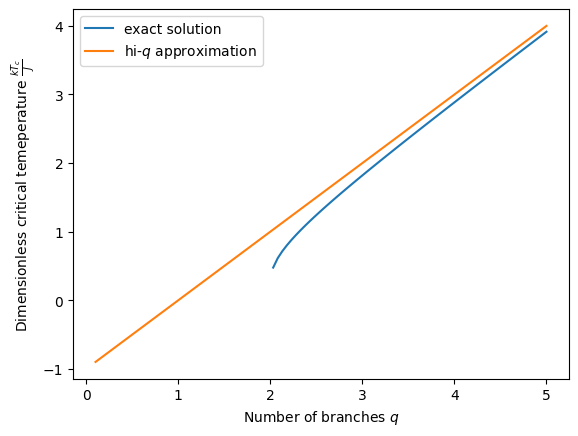

In [95]:
def KTc_over_J(q):
    return 2/(np.log((q)/(q-2)))

def hi_q_approx(q):
    return q-1

q = np.linspace(0.1, 5, 100)

plt.plot(q, KTc_over_J(q), label = "exact solution",)
plt.plot(q, hi_q_approx(q), label = r"hi-$q$ approximation")
plt.legend()
plt.ylabel(r"Dimensionless critical temeperature $\frac{kT_c}{J}$")
plt.xlabel(r"Number of branches $q$")

## 2:

In an ideal Bose Gas, we found that 

$$
n_0 = 1 - \left(T / T_c\right)^{3/2}
$$

Now we can make the substitution $\bar T = (T/T_c)^{3/2} = \epsilon +1$ where $\epsilon  =  \frac{T - T_c}{T_c}$. 

Thus, we can recast our formula for $n_0$ as:

$$
n_0 = 1 - (\epsilon +1)^{3/2}
$$

and then we Taylor expand, using that $(1 + x)^n \approx 1 +nx$:

$$
n_0 \approx 1 - \left(1 + \frac{3}{2} \epsilon \right)
$$

and at last we see:

$$
n_0 \simeq \mathcal{O}(-\epsilon),
$$

and therefore, $\beta = 1$.

## 3a:

Previously, we found that 

$$
\mathcal{H}_{mf} = -B \sum_{i} s_i - qJm \sum_{i} s_i
$$

and when $B = 0$ we have:

$$
\mathcal{H}_{mf} = - qJm \sum_{i} s_i.
$$

Now as we've seen before, the sum over all spin states $s_i$ should be, on average, the total number of sites $N$ times the net magnetization $m$. Thus, 

$$
\boxed {\langle \mathcal{H}_{mf} \rangle = -NqJm^2}
$$
